In [7]:
import pandas as pd
df = pd.read_csv('surf_noNA.csv')
df = df.drop(['Unnamed: 0'], axis=1)
df = df.dropna(axis=1)
# df

,ID,Length_mm,LengthPSLRatio,Depth_m,Species,L_PSL.cm,L_chon.cm,L_lower.cm,T_short.um,T_long.um,T_ratio,Ages_Vonbert,L_PSL.mm,R2,PSL_ratio
0,BC01,118.92,0.323495,38.00000,solidissima,3.847,1.243,3.006,2378.760,3213.740,0.740184,4,38.47,0.858446,0.323495
1,BC03,112.25,0.312160,38.00000,solidissima,3.504,1.155,2.701,2875.626,3498.857,0.821876,5,35.04,0.858446,0.312160
2,BC06,112.63,0.307556,38.00000,solidissima,3.464,0.949,2.300,2305.022,2691.338,0.856460,5,34.64,0.858446,0.307556
3,BC08,109.65,0.292567,38.00000,solidissima,3.208,1.166,2.518,2483.194,3048.450,0.814576,5,32.08,0.858446,0.292567
4,BC09,120.54,0.296997,38.00000,solidissima,3.580,0.958,2.711,2747.981,3206.322,0.857051,4,35.80,0.858446,0.296997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,CVOW_18_2,85.00,0.364235,32.32861,similis,3.096,0.949,2.395,2120.000,2700.208,0.785125,3,30.96,0.881055,0.364235
155,CVOW_18_3,75.00,0.370000,32.32861,similis,2.775,0.642,1.980,1373.608,1963.670,0.699511,2,27.75,0.881055,0.370000
156,CVOW_19_1,100.00,0.325000,37.41023,similis,3.250,0.994,2.539,1920.026,2504.157,0.766735,5,32.50,0.881055,0.325000
157,CVOW_20_2,71.00,0.431408,30.08871,similis,3.063,0.996,2.132,1417.392,2153.631,0.658141,2,30.63,0.881055,0.431408


In [29]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

X = df[['T_ratio', 'PSL_ratio']]
y = df['Species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = RandomForestClassifier(n_estimators=100, random_state=42, 
                             bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2
)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print(conf_matrix)
print("\nAccuracy Score:", accuracy)


In [30]:
# from sklearn.model_selection import train_test_split, GridSearchCV
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'bootstrap': [True, False]
# }
# clf = RandomForestClassifier(random_state=42)
# grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, 
#                            cv=5, n_jobs=-1, verbose=2, scoring='accuracy')
# grid_search.fit(X_train, y_train)
# best_clf = grid_search.best_estimator_
# y_pred = best_clf.predict(X_test)
# conf_matrix = confusion_matrix(y_test, y_pred)
# accuracy = accuracy_score(y_test, y_pred)

# print("Best Parameters:", grid_search.best_params_)
# print("\nConfusion Matrix:")
# print(conf_matrix)
# print("\nAccuracy Score:", accuracy)


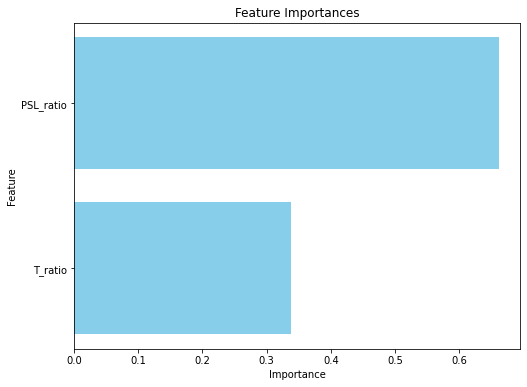

In [28]:
feature_importances = clf.feature_importances_
features = X.columns

plt.figure(figsize=(8, 6))
plt.barh(features, feature_importances, color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()